### Business Context

The dataset is highly imbalanced, the positive class (frauds) account for 3.83% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. 

Dataset link: [Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

###Loading Libraries and Dataset

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from plot_metric.functions import BinaryClassification


In [2]:
# import dataset
path = '/content/creditcard.csv'
data = pd.read_csv(path)
data.sample(3)

,ID,PC1,PC2,PC3,PC4,PC5,Class
1837,1837,-50.114321,37.831445,-8.146302,-2.284204,0.692474,0
3166,3166,40.622601,-19.866417,18.990157,-0.391503,1.229107,0
1226,1226,-52.298035,15.566875,17.859909,-2.040670,-0.783340,0


### Exploring the dataset

In [3]:
# check the shape of dataset - we seem to have no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4700 non-null   int64  
 1   PC1     4700 non-null   float64
 2   PC2     4700 non-null   float64
 3   PC3     4700 non-null   float64
 4   PC4     4700 non-null   float64
 5   PC5     4700 non-null   float64
 6   Class   4700 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 257.2 KB


In [4]:
# check head of the dataset
data.sample(5)

,ID,PC1,PC2,PC3,PC4,PC5,Class
2458,2458,-49.901713,39.468336,14.457293,1.835040,0.535334,0
1177,1177,-53.133758,7.454896,9.574790,0.070183,-0.875327,0
3578,3578,-52.117705,17.451819,13.569777,-2.178994,-0.773186,0
13,13,-49.214867,47.275588,-31.006959,-0.774716,0.661722,0
1766,1766,-50.878258,30.068464,-0.175975,-1.935713,-0.045743,0


In [5]:
#missing values - be sure about
data.isna().sum()

ID       0
PC1      0
PC2      0
PC3      0
PC4      0
PC5      0
Class    0
dtype: int64

In [6]:
# check the target class distribution

data['Class'].value_counts()

0    4520
1     180
Name: Class, dtype: int64

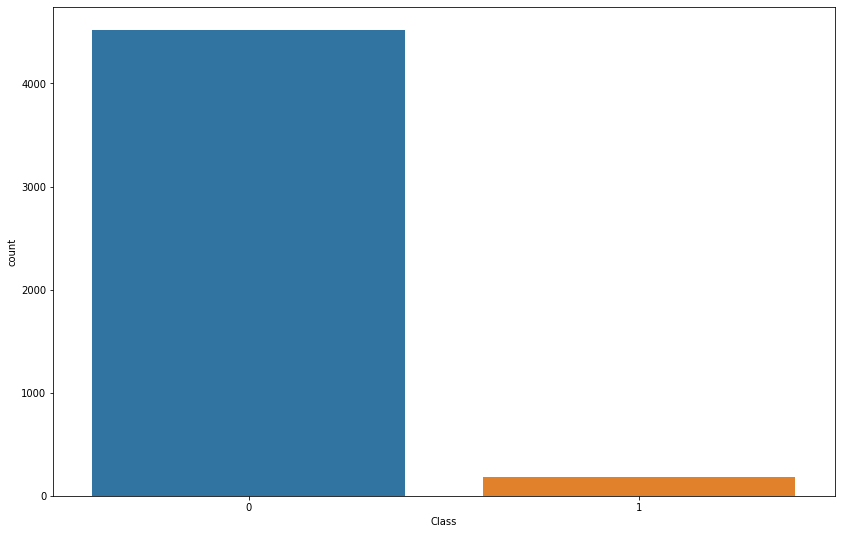

In [7]:
# create a visual plot to see the target distribution
plt.figure(figsize = (14,9))
sns.countplot(data = data, x = 'Class')
plt.show()

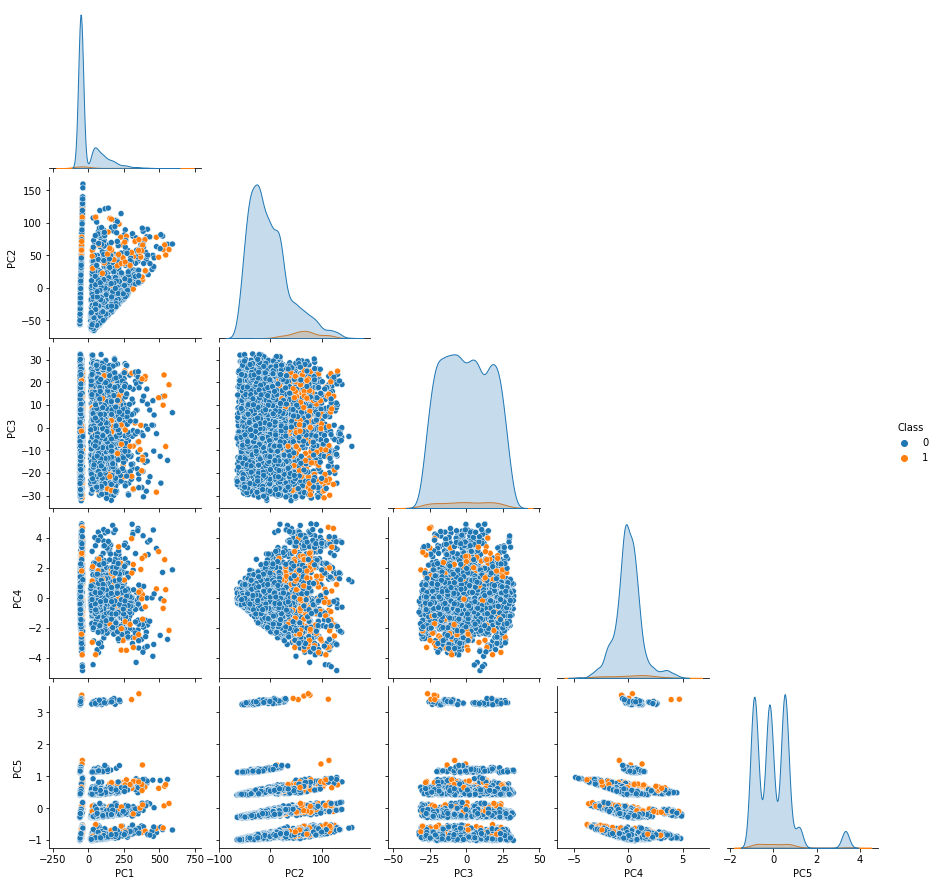

In [8]:
# Pairplot is useful when there are few columns
sns.pairplot(data[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Class']], hue="Class", corner= True)

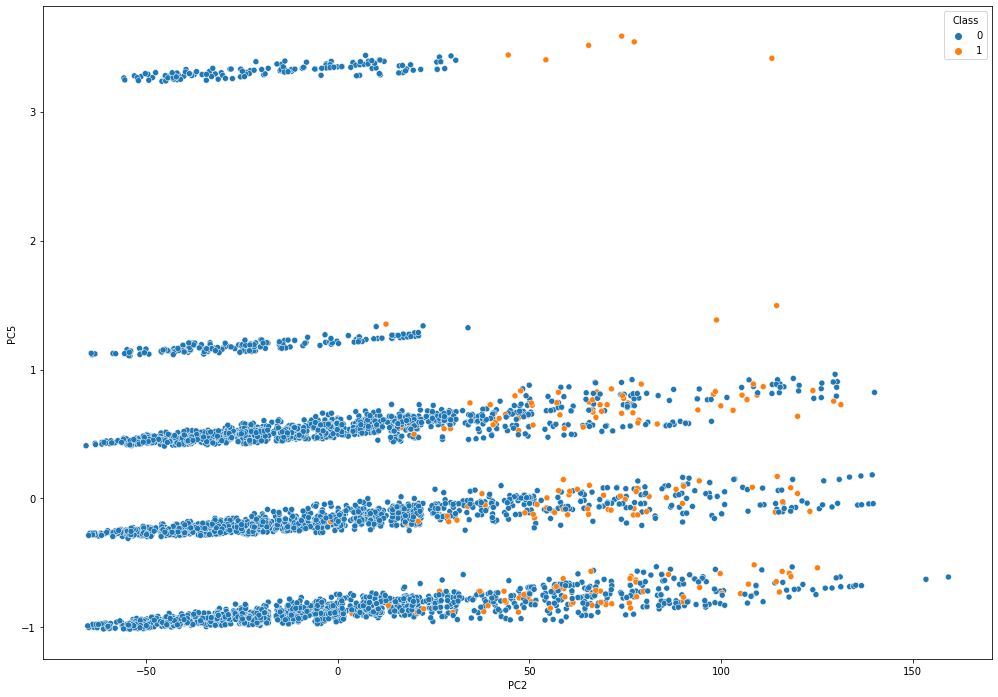

In [9]:
# PC2 and PC5 seem to have a decision boundry
plt.figure(figsize=(17,12))
sns.scatterplot(data = data, x = 'PC2', y = 'PC5', hue = 'Class')
plt.show()

### Evaluation &  Metric Selection

In [10]:
# baseline accuracy of the model

round(data['Class'].value_counts(normalize=True) * 100, 2)
# If we predict all classes as 0, we will get 96% accuracy.

0    96.17
1     3.83
Name: Class, dtype: float64

- TP - transactions which are actually fraudulent and the model also able correctly identify them as fraudulent transactions
- FP - transactions which are actually non fraudulent transactions but the model is predicting them as fraudulent transactions
- TN - transactions which are actually non fraudulent transactions and model is also predicting them as non fraudulent transactions
- FN - transactions which are actually fraudulent but the model is predicting them as non fraudulent transactions

$$recall = \frac{TP}{TP + FN}$$

$$precision = \frac{TP }{TP+ FP}$$

### Random Forest Model

In [11]:
# drop the ID variable as it is unique for all the transactions and does not have any meaningful information about the data

data.drop(['ID'], axis = 1, inplace = True)

In [12]:
# extract features and target from the original dataset
features = data.drop(['Class'], axis = 1)
target = data['Class']

print('Features shape: ',features.shape)
print('Targets shape: ',target.shape)

Features shape:  (4700, 5)
Targets shape:  (4700,)


In [13]:
# split the dataset into trainig and test set to train and evaluate the model respectively

x_train, x_test, y_train, y_test = tts(features, target, test_size = 0.25)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (3525, 5)
x_test shape:  (1175, 5)
y_train shape:  (3525,)
y_test shape:  (1175,)


In [14]:
# create a random forest model

rf = RandomForestClassifier(n_estimators = 150)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
# predict for the test dataset
y_hat = rf.predict(x_test)

In [16]:
score = accuracy_score(y_test, y_hat)
score
# See how misleading it is

0.963404255319149

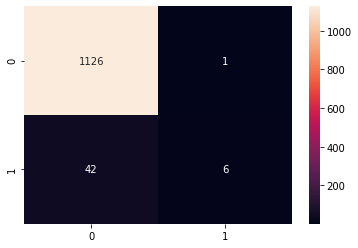

In [23]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot = True, fmt = 'd')

In [21]:
# print the classification report

report = classification_report(y_test, y_hat, output_dict=True, target_names=['Non-Fraudulent', 'Fraudulent'])
df_classification_report = pd.DataFrame(report).T
df_classification_report

,Non-Fraudulent,Fraudulent,accuracy,macro avg,weighted avg
precision,0.964041,0.857143,0.963404,0.910592,0.959674
recall,0.999113,0.125000,0.963404,0.562056,0.963404
f1-score,0.981264,0.218182,0.963404,0.599723,0.950091
support,1127.000000,48.000000,0.963404,1175.000000,1175.000000


Can we increase **Fraudulent Recall**?

### Resampling techniques for imbalanced data

![ex](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_0031.png)

**SMOTE (Synthetic Minority Oversampling Technique)**: It randomly picks a point from the minority class and computes the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

#### Synthetic Minority Oversampling Technique (SMOTE)

In [30]:
# import imblearn library and resample the original data using SMOTE technique
from imblearn.over_sampling import SMOTE
import numpy as np
smote = SMOTE()
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)

(unique, counts) = np.unique(y_train_os, return_counts=True)
print('Unique: ',unique)
print('Counts: ', counts)

Unique:  [0 1]
Counts:  [3393 3393]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
# train a random forest model on SMOTE data

rf = RandomForestClassifier(n_estimators=150)
rf.fit(x_train_os, y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

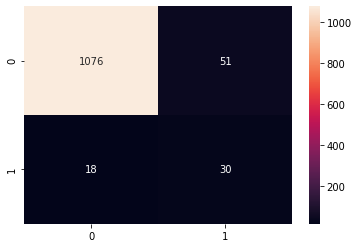

In [33]:
# predict the classes on test data using model built on SMOTE data and plot the confusion matrix

y_hat = rf.predict(x_test)
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot = True, fmt = 'd')

In [35]:
# print the classification report

report = classification_report(y_test, y_hat, output_dict=True, target_names=['Non-Fraudulent', 'Fraudulent'])
df_classification_report = pd.DataFrame(report).T
df_classification_report

,precision,recall,f1-score,support
Non-Fraudulent,0.983547,0.954747,0.968933,1127.000000
Fraudulent,0.370370,0.625000,0.465116,48.000000
accuracy,0.941277,0.941277,0.941277,0.941277
macro avg,0.676958,0.789874,0.717025,1175.000000
weighted avg,0.958498,0.941277,0.948351,1175.000000


We can tune threshold for to increase Recall more

### Computing ROC AUC Curve

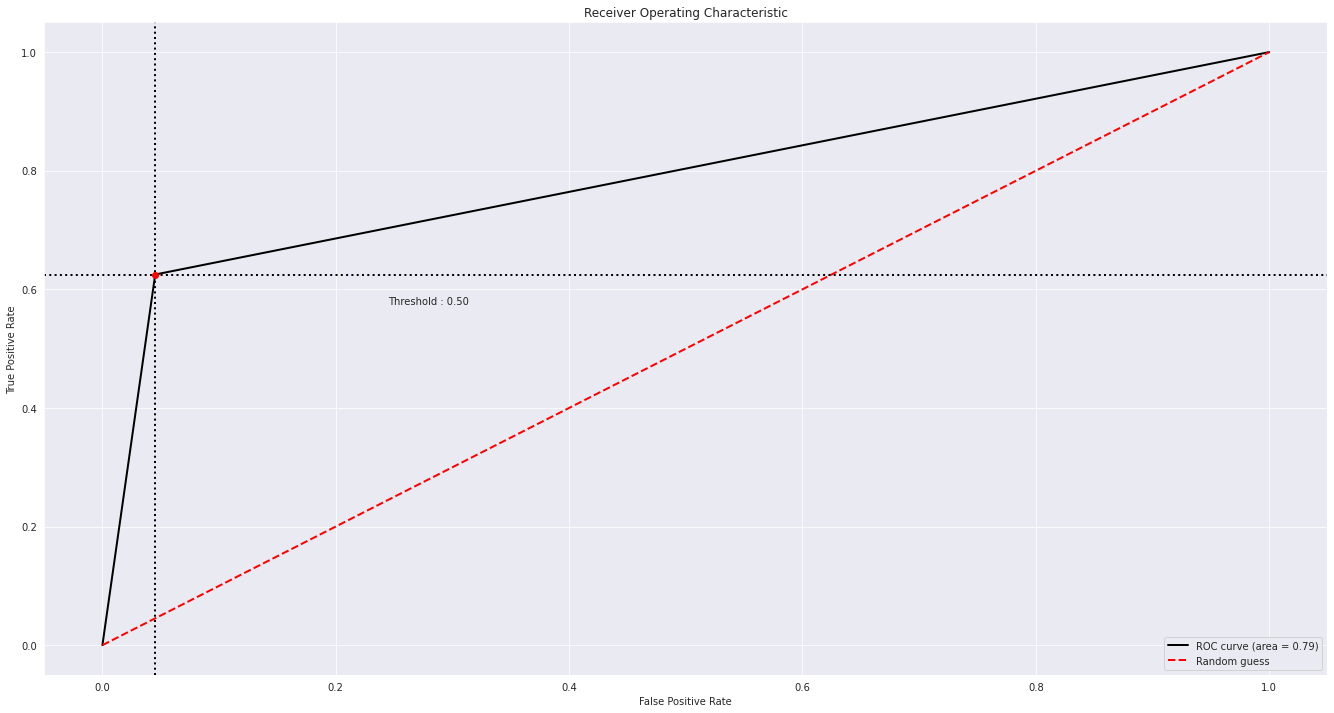

In [44]:
# let's compute the AUC curve for the model we developed on SMOTE data
bc = BinaryClassification(y_test, y_hat, labels=[0,1])
plt.figure(figsize=(23,12))
bc.plot_roc_curve()
plt.show()

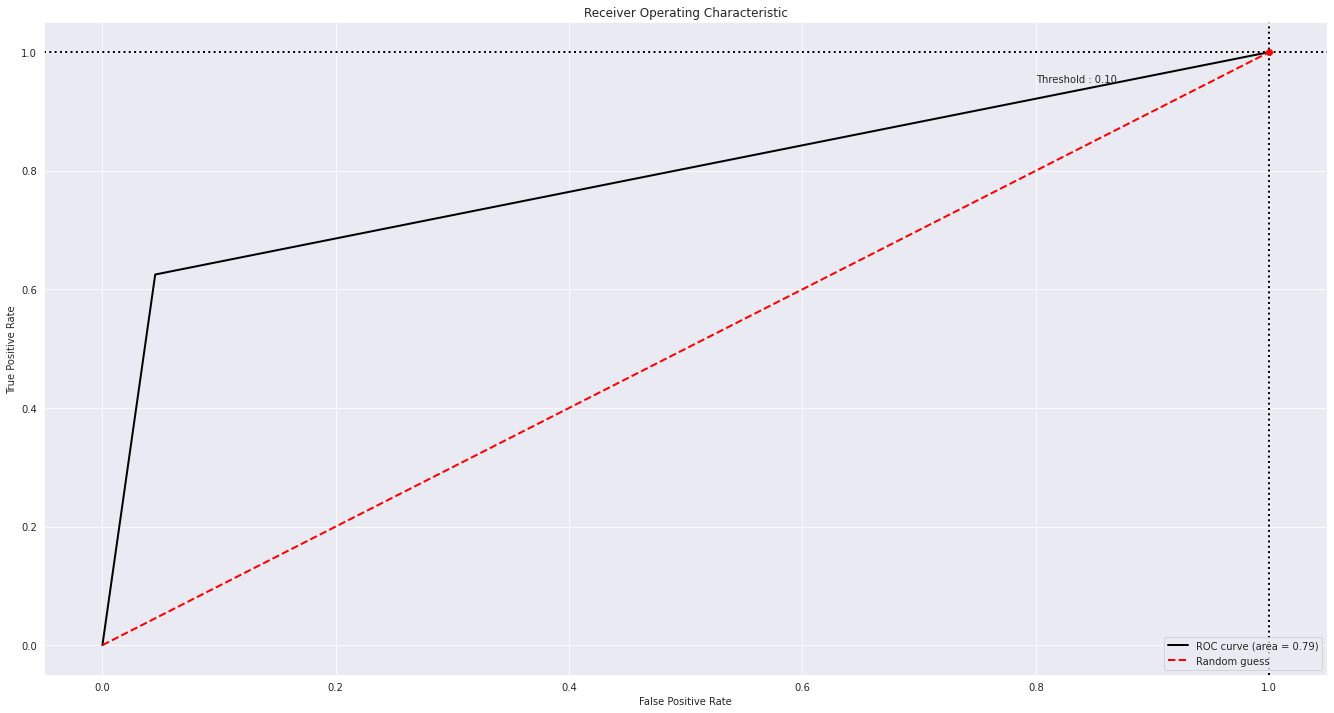

In [63]:
# let's use another probability threshold so that we can get to the elbow position in the above curve

bc = BinaryClassification(y_test, y_hat, labels=[0,1], threshold=0.1)
plt.figure(figsize=(23,12))
bc.plot_roc_curve()
plt.show()

###Adjusting probability threshold

In [54]:
# compute the probabilites of test observations using rf_smote model

y_pred_prob = rf.predict_proba(x_test)[:,1]

In [59]:
# compare these probabilities against the probability threshold of 10% rather than the default threshold of 50%

y_pred_labels = (y_pred_prob >= 0.1)

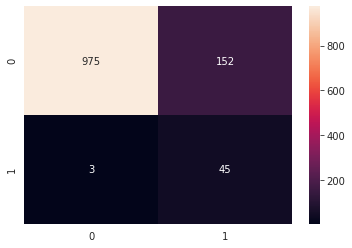

In [60]:
# plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot = True, fmt = 'd')

In [62]:
# print the classification report

report = classification_report(y_test, y_pred_labels, output_dict=True, target_names=['Non-Fraudulent', 'Fraudulent'])
df_classification_report = pd.DataFrame(report).T
df_classification_report

,precision,recall,f1-score,support
Non-Fraudulent,0.996933,0.865129,0.926366,1127.000000
Fraudulent,0.228426,0.937500,0.367347,48.000000
accuracy,0.868085,0.868085,0.868085,0.868085
macro avg,0.612679,0.901314,0.646856,1175.000000
weighted avg,0.965538,0.868085,0.903529,1175.000000
